<a href="https://colab.research.google.com/github/sachaRfd/Reef_Project/blob/main/simple_autoencoder_run_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Auto Encoder Run with Reef Images:

## Comments:
- This is just running the auto-encoder --> Then we will move on to integrating the RPCA model

- Testing the model with the training set --> Not good but just to try as loading each image can be a pain
- Model is working but not very good 
- Data needs more preprocessing --> they should have similar shapes


## TO DO:
- Clean the data
  - Get data that has same shape or remove the data that is like 1 tile big 
  - Get the data normalised prior to loading onto Colab
- Look into bigger model --> Upgrade Colab with own GPU




In [1]:
! pip install tensorflow
! pip install rasterio
! pip install torch

import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
True


In [2]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import numpy as np

# def batches(l, n):
#     """Yield successive n-sized batches from l, the last batch is the left indexes."""
#     for i in range(0, l, n):
#         yield range(i,min(l,i+n))

# class Deep_Autoencoder(object):
#     def __init__(self, sess, input_dim_list=[784,400]):
#         """input_dim_list must include the original data dimension"""
#         assert len(input_dim_list) >= 2
#         self.W_list = []
#         self.encoding_b_list = []
#         self.decoding_b_list = []
#         self.dim_list = input_dim_list
#         self.learning_rate = tf.compat.v1.placeholder(tf.float32, shape=())
#         ## Encoders parameters
#         for i in range(len(input_dim_list)-1):
#             init_max_value = np.sqrt(6. / (self.dim_list[i] + self.dim_list[i+1]))
#             self.W_list.append(tf.Variable(tf.random.uniform([self.dim_list[i],self.dim_list[i+1]],
#                                                              np.negative(init_max_value),init_max_value)))
#             self.encoding_b_list.append(tf.Variable(tf.random.uniform([self.dim_list[i+1]],-0.1,0.1)))
#         ## Decoders parameters
#         for i in range(len(input_dim_list)-2,-1,-1):
#             self.decoding_b_list.append(tf.Variable(tf.random.uniform([self.dim_list[i]],-0.1,0.1)))
#         ## Placeholder for input
#         self.input_x = tf.compat.v1.placeholder(tf.float32,[None,self.dim_list[0]])
#         ## coding graph :
#         last_layer = self.input_x
#         for weight,bias in zip(self.W_list,self.encoding_b_list):
#             hidden = tf.sigmoid(tf.matmul(last_layer,weight) + bias)
#             last_layer = hidden
#         self.hidden = hidden 
#         ## decode graph:
#         for weight,bias in zip(reversed(self.W_list),self.decoding_b_list):
#             hidden = tf.sigmoid(tf.matmul(last_layer,tf.transpose(weight)) + bias)
#             last_layer = hidden
#         self.recon = last_layer
   
#         self.cost = 200 * tf.reduce_mean(tf.square(self.input_x - self.recon))
# #         self.cost = 200*tf.losses.log_loss(self.recon, self.input_x)
#         self.train_step = tf.compat.v1.train.AdamOptimizer(self.learning_rate).minimize(self.cost)
#         sess.run(tf.compat.v1.global_variables_initializer())

#     def fit(self, X, sess, learning_rate=0.15,
#             iteration=200, batch_size=50, init=False,verbose=False):
#         assert X.shape[1] == self.dim_list[0]
#         if init:
#             sess.run(tf.global_variables_initializer())
#         sample_size = X.shape[0]
#         for i in range(iteration):
#             for one_batch in batches(sample_size, batch_size):
#                 sess.run(self.train_step,feed_dict = {self.input_x:X[one_batch], self.learning_rate: learning_rate})

#             if verbose and i%20==0:
#                 e = self.cost.eval(session = sess,feed_dict = {self.input_x: X})
#                 print ("    iteration : ", i ,", cost : ", e)

#     def transform(self, X, sess):
#         return self.hidden

#     def getRecon(self, X, sess):
#         return self.recon.eval(session = sess,feed_dict={self.input_x: X})
    
# ##################### test a machine with different data size#####################  
# def test():
#     start_time = time.time()
#     with tf.Session() as sess:
#         ae = Deep_Autoencoder(sess = sess, input_dim_list=[784,625,400,225,100])
#         error = ae.fit(x[:1000] ,sess = sess, learning_rate=0.01, batch_size = 500, iteration = 1000, verbose=False)

#     print ("size 1000 Runing time:" + str(time.time() - start_time) + " s")

#     start_time = time.time()
#     with tf.Session() as sess:
#         ae = Deep_Autoencoder(sess = sess, input_dim_list=[784,625,400,225,100])
#         error = ae.fit(x[:10000] ,sess = sess, learning_rate=0.01, batch_size = 500, iteration = 1000, verbose=False)

#     print ("size 10,000 Runing time:" + str(time.time() - start_time) + " s")

#     start_time = time.time()
#     with tf.Session() as sess:
#         ae = Deep_Autoencoder(sess = sess, input_dim_list=[784,625,400,225,100])
#         error = ae.fit(x[:20000] ,sess = sess, learning_rate=0.01, batch_size = 500, iteration = 1000, verbose=False)

#     print ("size 20,000 Runing time:" + str(time.time() - start_time) + " s")

#     start_time = time.time()
#     with tf.Session() as sess:
#         ae = Deep_Autoencoder(sess = sess, input_dim_list=[784,625,400,225,100])
#         error = ae.fit(x[:50000] ,sess = sess, learning_rate=0.01, batch_size = 500, iteration = 1000, verbose=False)

#     print ("size 50,000 Runing time:" + str(time.time() - start_time) + " s")

In [3]:
# Dataset class:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class ReefDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.data = []
        for i in range(550):
            test_arr = np.load(f"{data_dir}/Reef_{i}.npy", allow_pickle=True)
            self.data.append(test_arr)
        self.data = np.array(self.data)
        self.data = self.data.reshape(550, 300*300)
        
        # normalize data between -1 and 1:
        self.data = (self.data - np.mean(self.data)) / np.std(self.data)
        
        self.data = torch.from_numpy(self.data).float()
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

# Example usage
dataset = ReefDataset('/content/reef_data')
dataloader = DataLoader(dataset, batch_size=20, shuffle=True)

next(iter(dataloader))


tensor([[-0.7975, -0.7975, -0.7975,  ..., -0.7975, -0.7975, -0.7975],
        [-0.7975, -0.7975, -0.7975,  ..., -0.2095, -0.2095, -0.2095],
        [-0.7975, -0.7975, -0.7975,  ..., -0.7975, -0.7975, -0.7975],
        ...,
        [-0.7975, -0.7975, -0.7975,  ..., -0.7422, -0.7409, -0.7409],
        [-0.1808, -0.1808, -0.1808,  ..., -0.7975, -0.7975, -0.7975],
        [ 0.2691,  0.2691,  0.2691,  ...,  0.6471,  0.6471,  0.6471]])

In [4]:
import matplotlib.pyplot as plt

# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(300*300, 3000),
            nn.ReLU(),
            nn.Linear(3000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 100),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(100, 1000),
            nn.ReLU(),
            nn.Linear(1000, 3000),
            nn.ReLU(),
            nn.Linear(3000, 300*300),
            # nn.Sigmoid()  # Output Between 0 and 1 --> so input data has to be in that range too
            nn.Tanh()  # Output between -1 and 1
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def train(model, dataloader, num_epochs):
    model.train()
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(num_epochs):
        running_loss = 0.0
        for img in dataloader:
            img = img.view(img.size(0), -1).to(device)
            optimizer.zero_grad()
            outputs = model(img)
            loss = criterion(outputs, img)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, running_loss/len(dataloader)))


def test(model, dataloader):
  #Test the model: 
  model.eval()  # Set to eval mode
  test_loss = 0
  model.to(device)
  criterion = nn.MSELoss()
  with torch.no_grad():
      for img in dataloader:
          img = img.view(img.size(0), -1).to(device)
          recon = model(img)
          loss = criterion(recon, img)
          test_loss += loss.item()
  
  test_loss /= len(dataloader)
  print('Test Loss: {:.4f}'.format(test_loss))
  print("Original: ")
  plt.imshow(img.view(-1, 300, 300).to('cpu').numpy()[0])
  plt.title("Original")
  plt.show() 
  print("Reconstruction:")
  plt.imshow(recon.view(-1, 300, 300).to('cpu').numpy()[0])
  plt.show()
  return img, recon

In [5]:
# Initialize the autoencoder model and train it
autoencoder = Autoencoder()
print(f"Number of parameters in the model: {sum(p.numel() for p in autoencoder.parameters())}")
train(autoencoder, dataloader, num_epochs=20)

Number of parameters in the model: 546298100
Epoch [1/20], Loss: 0.7384
Epoch [2/20], Loss: 0.5662
Epoch [3/20], Loss: 0.7000
Epoch [4/20], Loss: 0.5256
Epoch [5/20], Loss: 0.5107
Epoch [6/20], Loss: 0.5125
Epoch [7/20], Loss: 0.4985
Epoch [8/20], Loss: 0.5276
Epoch [9/20], Loss: 0.4943
Epoch [10/20], Loss: 0.4889
Epoch [11/20], Loss: 0.4821
Epoch [12/20], Loss: 0.4687
Epoch [13/20], Loss: 0.4606
Epoch [14/20], Loss: 0.4822
Epoch [15/20], Loss: 0.4678


KeyboardInterrupt: ignored

Test Loss: 0.4441
Original: 


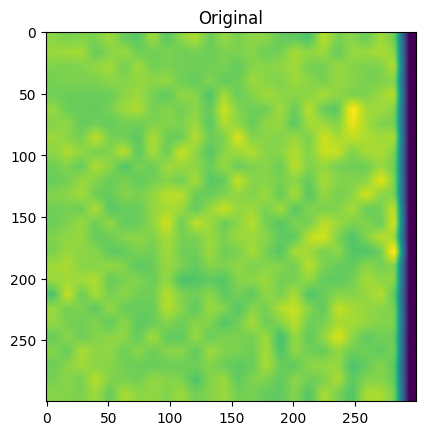

Reconstruction:


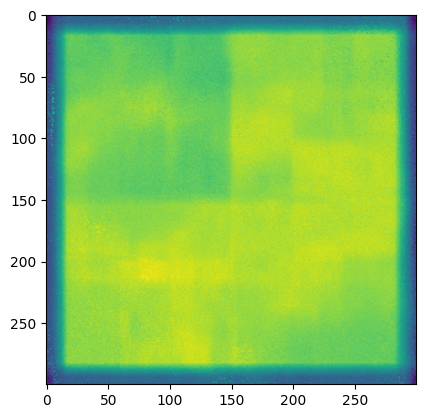

In [25]:
img, rec = test(autoencoder, dataloader)

In [20]:
print(sum(sum(img !=0)))
print(sum(sum(rec != 0)))

tensor(900000, device='cuda:0')
tensor(900000, device='cuda:0')


In [21]:
sum(rec[rec!=0])

tensor(-115373.6797, device='cuda:0')